## Objective

- Come up with a customer profile (characteristics of a customer) of the different products 
- Based on the data we have to generate a set of insights and recommendations that will help 
the company in targeting new customers 

In [2]:
# importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the dataset

df = pd.read_csv('Cardio.csv')

df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
# display top 5 records

df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
# display bottom 5 records

df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [6]:
# checking all columns

df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [7]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

### Data Preprocessing

1. No fixing required on rows and columns

2. Duplicates

In [8]:
df.duplicated().sum()

0

obs: No duplicate record found.

3. Missing values

In [9]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

obs: No missing value found

4. Outliers

In [10]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


obs: No outliers in any of the columns but income is varying enough

## EDA

1. Univariate Analysis

In [11]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [12]:
# unique products

df['Product'].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [13]:
# no. of product

len(df['Product'].unique())

3

obs: We have three products namely: TM195, TM498, TM798

In [14]:
# most sold/popular product

df['Product'].value_counts()

Product
TM195    80
TM498    60
TM798    40
Name: count, dtype: int64

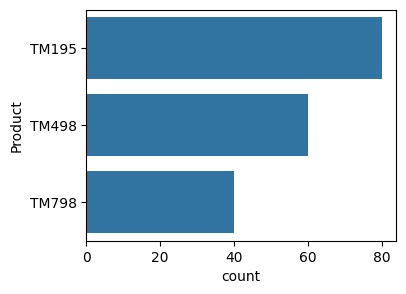

In [19]:
# visualizing popularity of products

plt.figure(figsize=(4,3))
sns.countplot(df['Product'])
plt.show()

obs: 
- The most popular product is TM195
- The least popular product is TM798

In [20]:
# popularity of products by gender

df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

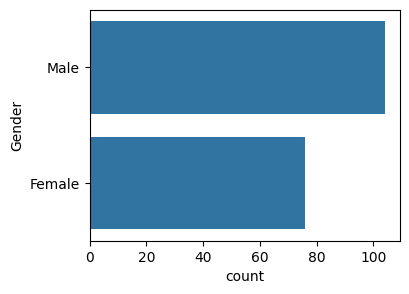

In [21]:
plt.figure(figsize=(4,3))
sns.countplot(df['Gender'])
plt.show()

obs: Male are most frequent buyers.

In [22]:
df[['Income','Age','Education']].describe()

,Income,Age,Education
count,180.000000,180.000000,180.000000
mean,53719.577778,28.788889,15.572222
std,16506.684226,6.943498,1.617055
min,29562.000000,18.000000,12.000000
25%,44058.750000,24.000000,14.000000
50%,50596.500000,26.000000,16.000000
75%,58668.000000,33.000000,16.000000
max,104581.000000,50.000000,21.000000


<Axes: xlabel='Income', ylabel='Count'>

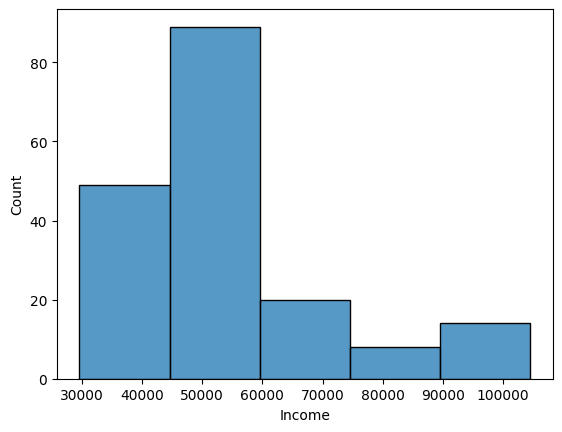

In [24]:
sns.histplot(df['Income'],bins=5)

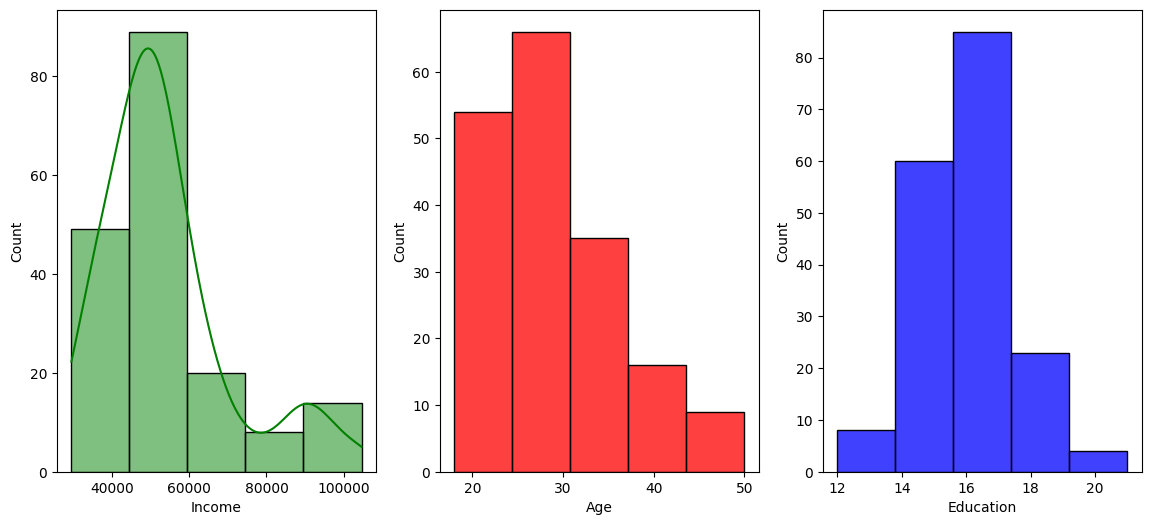

In [31]:
fig, axes = plt.subplots(1,3,figsize=(14,6))

sns.histplot(df['Income'],ax=axes[0],bins=5,kde=True,color='g')

sns.histplot(df['Age'],ax=axes[1],bins=5,color='r')

sns.histplot(df['Education'],ax=axes[2],bins=5,color='b')

plt.show()

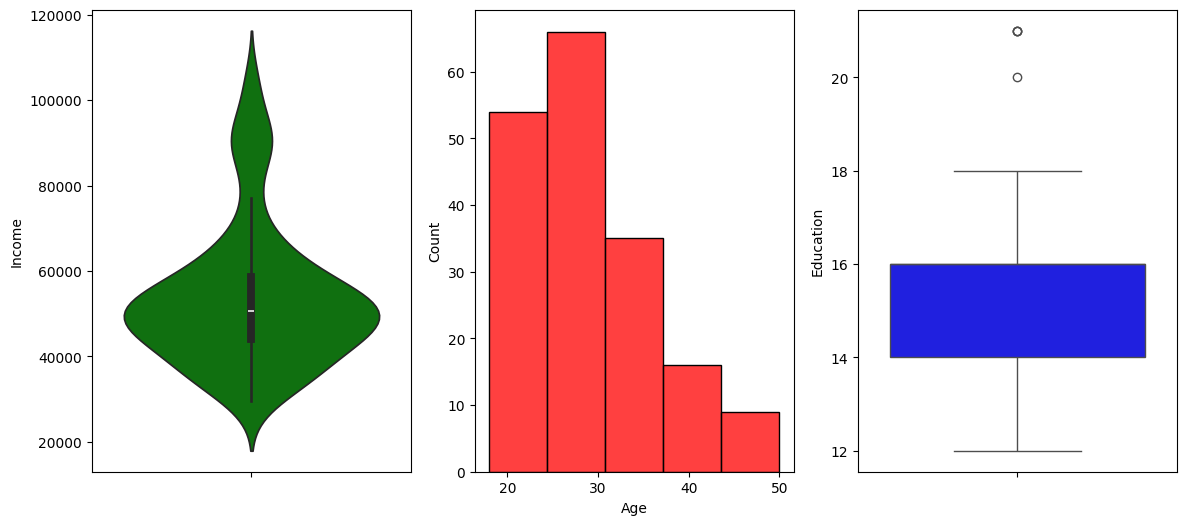

In [34]:
fig, axes = plt.subplots(1,3,figsize=(14,6))

sns.violinplot(df['Income'],ax=axes[0],color='g')

sns.histplot(df['Age'],ax=axes[1],bins=5,color='r')

sns.boxplot(df['Education'],ax=axes[2],color='b')

plt.show()

obs:

- Income is lying between 20k to 1 lac+, but most of the buyers lies between 35k to 65k

- Age is lying bewteen 18 to 50, but most of the buyes lies between 18 to 35.

- Education is lying between 12 to 21, but most the buyers lies between 14 to 16

In [35]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

2. Bivariate Analysis

In [37]:
df[['Usage','Miles']].describe()

,Usage,Miles
count,180.000000,180.000000
mean,3.455556,103.194444
std,1.084797,51.863605
min,2.000000,21.000000
25%,3.000000,66.000000
50%,3.000000,94.000000
75%,4.000000,114.750000
max,7.000000,360.000000


In [38]:
df.groupby(['Usage'])['Miles'].mean()

Usage
2     58.545455
3     83.420290
4    118.942308
5    160.705882
6    212.857143
7    240.000000
Name: Miles, dtype: float64

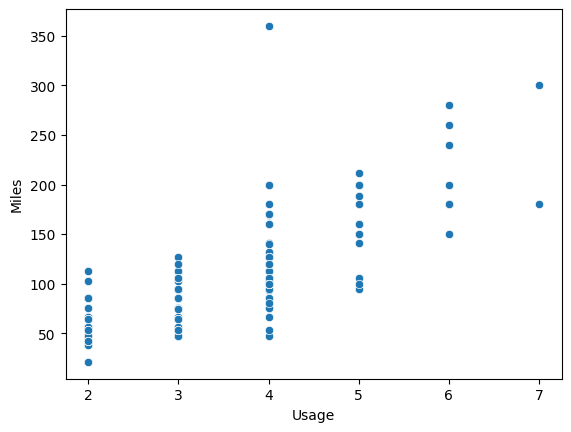

In [42]:
sns.scatterplot(x=df['Usage'],y=df['Miles'])
plt.show()

In [40]:
df['Usage'].value_counts()

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

obs:
    
- Most of the users use the treadmill for 3-4 days.
- More no. of days increases the miles.

In [44]:
# self rated fitness (univariate)

df['Fitness'].describe()

count    180.000000
mean       3.311111
std        0.958869
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Fitness, dtype: float64

In [45]:
df['Fitness'].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

obs:
    
- Average fitness of people is 3.
- Only 2 people have very bad fitness.

In [4]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [5]:
# display count based on maritalstatus

df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

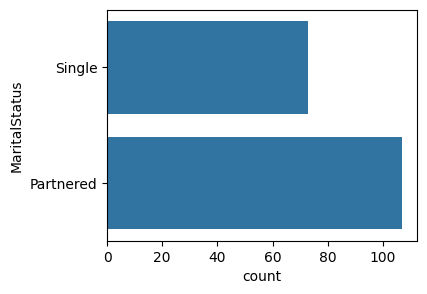

In [8]:
plt.figure(figsize=(4,3))
sns.countplot(df['MaritalStatus'])
plt.show()

obs: Married people are buying more than the single people.

In [10]:
# relationship between Income and Product

df.groupby(['Product'])['Income'].mean()

Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64

In [11]:
df2 = df.groupby(['Product'])[['Income']].mean()

df2

,Income
Product,
TM195,46418.025
TM498,48973.650
TM798,75441.575


In [12]:
df2.index

Index(['TM195', 'TM498', 'TM798'], dtype='object', name='Product')

In [13]:
df2['Income']

Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64

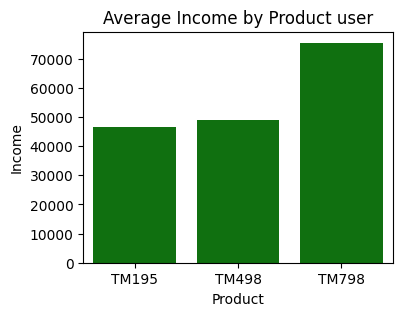

In [18]:
plt.figure(figsize=(4,3))

sns.barplot(x=df2.index,y=df2['Income'],color='g')
plt.title("Average Income by Product user")

plt.show()

In [19]:
df.groupby(['Product'])[['Age','Income','Education']].mean()

,Age,Income,Education
Product,,,
TM195,28.55,46418.025,15.037500
TM498,28.90,48973.650,15.116667
TM798,29.10,75441.575,17.325000


In [21]:
df3 = df.groupby(['Product'])[['Age','Income','Education']].mean() 

df3

,Age,Income,Education
Product,,,
TM195,28.55,46418.025,15.037500
TM498,28.90,48973.650,15.116667
TM798,29.10,75441.575,17.325000


In [28]:
df3['Income'] = df3['Income']/1000

df3

,Age,Income,Education
Product,,,
TM195,28.55,46.418025,15.037500
TM498,28.90,48.973650,15.116667
TM798,29.10,75.441575,17.325000


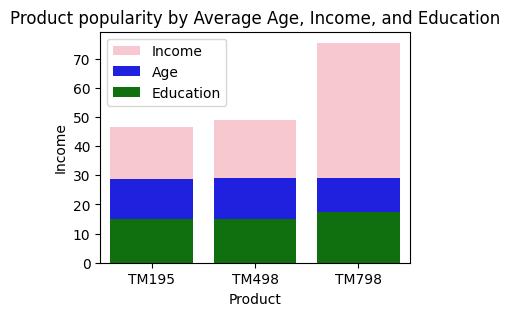

In [39]:
plt.figure(figsize=(4,3))

sns.barplot(x=df3.index,y=df3['Income'],color='pink',label='Income')
sns.barplot(x=df3.index,y=df3['Age'],color='b',label='Age')
sns.barplot(x=df3.index,y=df3['Education'],color='g',label='Education')

plt.title("Product popularity by Average Age, Income, and Education")

plt.legend()
plt.show()

obs:
    
- Age has no significant impact on model selection
- Income has significant impact on model selection
- Education has slight impact on model selection

### Summary:


## 2. Case Study

In [40]:
df = pd.read_excel(r"C:\Users\uwais\Downloads\Adidas_US_Sales_Sample.xlsx")

df

,Invoice Date,Retailer,Retailer ID,Location ID,Product ID,Price per Unit,Units Sold,Operating Profit
0,2024-01-10,Walmart,R003,L003,P002,95.49,35,913.23
1,2024-01-30,Amazon,R004,L001,P004,115.57,49,1300.07
2,2024-06-25,Foot Locker,R002,L001,P002,176.93,31,1518.10
3,2024-02-19,Walmart,R003,L002,P003,103.71,27,403.93
4,2024-06-16,Amazon,R004,L003,P003,109.38,27,516.91
...,...,...,...,...,...,...,...,...
195,2024-01-26,Walmart,R003,L003,P003,80.94,47,568.65
196,2024-04-02,Amazon,R004,L002,P004,96.22,21,277.81
197,2024-02-16,Foot Locker,R002,L001,P003,184.63,11,338.42
198,2024-04-13,Walmart,R003,L001,P001,53.42,33,273.20


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Invoice Date      200 non-null    object 
 1   Retailer          200 non-null    object 
 2   Retailer ID       200 non-null    object 
 3   Location ID       200 non-null    object 
 4   Product ID        200 non-null    object 
 5   Price per Unit    200 non-null    float64
 6   Units Sold        200 non-null    int64  
 7   Operating Profit  200 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 12.6+ KB


In [42]:
df.head()

,Invoice Date,Retailer,Retailer ID,Location ID,Product ID,Price per Unit,Units Sold,Operating Profit
0,2024-01-10,Walmart,R003,L003,P002,95.49,35,913.23
1,2024-01-30,Amazon,R004,L001,P004,115.57,49,1300.07
2,2024-06-25,Foot Locker,R002,L001,P002,176.93,31,1518.10
3,2024-02-19,Walmart,R003,L002,P003,103.71,27,403.93
4,2024-06-16,Amazon,R004,L003,P003,109.38,27,516.91


In [43]:
df.tail()

,Invoice Date,Retailer,Retailer ID,Location ID,Product ID,Price per Unit,Units Sold,Operating Profit
195,2024-01-26,Walmart,R003,L003,P003,80.94,47,568.65
196,2024-04-02,Amazon,R004,L002,P004,96.22,21,277.81
197,2024-02-16,Foot Locker,R002,L001,P003,184.63,11,338.42
198,2024-04-13,Walmart,R003,L001,P001,53.42,33,273.20
199,2024-06-22,Target,R005,L004,P005,134.90,35,1201.80


In [44]:
df.describe()

,Price per Unit,Units Sold,Operating Profit
count,200.00000,200.00000,200.000000
mean,123.32140,27.31500,700.036300
std,45.25916,13.82103,542.753116
min,50.47000,5.00000,40.180000
25%,83.75750,14.00000,290.602500
50%,121.63000,27.00000,528.690000
75%,162.29250,39.25000,1003.740000
max,199.56000,50.00000,2602.130000


In [45]:
df.dtypes

Invoice Date         object
Retailer             object
Retailer ID          object
Location ID          object
Product ID           object
Price per Unit      float64
Units Sold            int64
Operating Profit    float64
dtype: object

In [46]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

df.dtypes

Invoice Date        datetime64[ns]
Retailer                    object
Retailer ID                 object
Location ID                 object
Product ID                  object
Price per Unit             float64
Units Sold                   int64
Operating Profit           float64
dtype: object

In [47]:
df.columns

Index(['Invoice Date', 'Retailer', 'Retailer ID', 'Location ID', 'Product ID',
       'Price per Unit', 'Units Sold', 'Operating Profit'],
      dtype='object')

In [48]:
df['Operating Profit'].describe()

count     200.000000
mean      700.036300
std       542.753116
min        40.180000
25%       290.602500
50%       528.690000
75%      1003.740000
max      2602.130000
Name: Operating Profit, dtype: float64

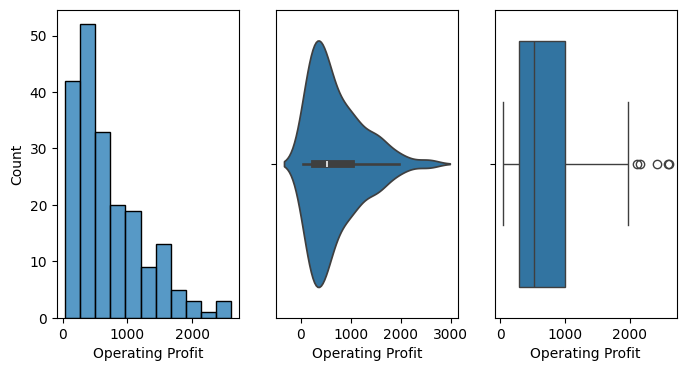

In [51]:
fig, axes = plt.subplots(1,3,figsize=(8,4))

sns.histplot(x=df['Operating Profit'],ax=axes[0])
sns.violinplot(x=df['Operating Profit'],ax=axes[1])
sns.boxplot(x=df['Operating Profit'],ax=axes[2])

plt.show()

In [55]:
def plot(column):
    
    fig, axes = plt.subplots(1,3,figsize=(8,4))

    sns.histplot(x=column,ax=axes[0],color='g',bins=4)
    sns.violinplot(x=column,ax=axes[1],color='pink')
    sns.boxplot(x=column,ax=axes[2],color='b')

    plt.show()

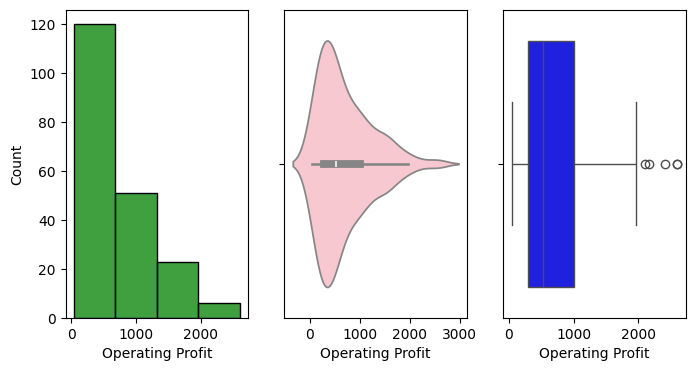

In [56]:
plot(df['Operating Profit'])

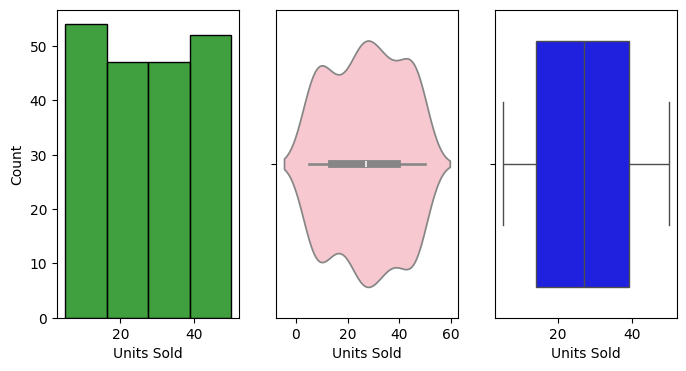

In [57]:
plot(df['Units Sold'])

In [59]:
df.columns

Index(['Invoice Date', 'Retailer', 'Retailer ID', 'Location ID', 'Product ID',
       'Price per Unit', 'Units Sold', 'Operating Profit'],
      dtype='object')

### Multivariate Analysis

In [61]:
# checking the relationship of all columns with repect to profit

corr_table = df[['Price per Unit','Units Sold','Operating Profit']].corr()

corr_table

,Price per Unit,Units Sold,Operating Profit
Price per Unit,1.000000,0.067961,0.569578
Units Sold,0.067961,1.000000,0.695648
Operating Profit,0.569578,0.695648,1.000000


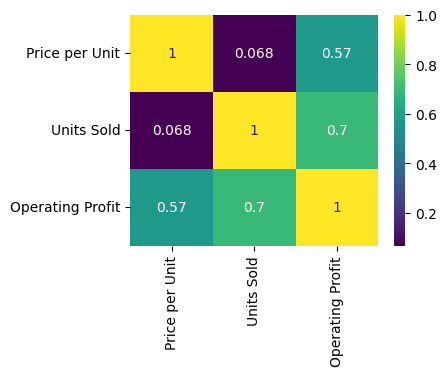

In [68]:
plt.figure(figsize=(4,3))
sns.heatmap(corr_table,annot=True,cmap='viridis')

plt.show()

In [71]:
# profit by product

df.groupby(['Product ID'])['Operating Profit'].sum()

Product ID
P001    27661.92
P002    28380.40
P003    23619.34
P004    27634.17
P005    32711.43
Name: Operating Profit, dtype: float64

In [72]:
df.columns

Index(['Invoice Date', 'Retailer', 'Retailer ID', 'Location ID', 'Product ID',
       'Price per Unit', 'Units Sold', 'Operating Profit'],
      dtype='object')

In [77]:
df['Month'] = df['Invoice Date'].dt.month

df

,Invoice Date,Retailer,Retailer ID,Location ID,Product ID,Price per Unit,Units Sold,Operating Profit,Year,Month
0,2024-01-10,Walmart,R003,L003,P002,95.49,35,913.23,2024,1
1,2024-01-30,Amazon,R004,L001,P004,115.57,49,1300.07,2024,1
2,2024-06-25,Foot Locker,R002,L001,P002,176.93,31,1518.10,2024,6
3,2024-02-19,Walmart,R003,L002,P003,103.71,27,403.93,2024,2
4,2024-06-16,Amazon,R004,L003,P003,109.38,27,516.91,2024,6
...,...,...,...,...,...,...,...,...,...,...
195,2024-01-26,Walmart,R003,L003,P003,80.94,47,568.65,2024,1
196,2024-04-02,Amazon,R004,L002,P004,96.22,21,277.81,2024,4
197,2024-02-16,Foot Locker,R002,L001,P003,184.63,11,338.42,2024,2
198,2024-04-13,Walmart,R003,L001,P001,53.42,33,273.20,2024,4


In [78]:
df.groupby(['Month'])['Operating Profit'].mean()

Month
1    811.298333
2    752.392571
3    786.022857
4    659.462286
5    590.747778
6    560.144063
Name: Operating Profit, dtype: float64

In [81]:
# replace month number by month name

df['Month'] = df['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun'})

df['Month'].unique()

array(['Jan', 'Jun', 'Feb', 'May', 'Mar', 'Apr'], dtype=object)